In [3]:
from tensorflow.keras.datasets import mnist

# Loads the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training set: (60000, 28, 28) (60000,)
Testing set: (10000, 28, 28) (10000,)


In [4]:
from tensorflow.keras.utils import to_categorical

# Normalize images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8959 - loss: 0.3642 - val_accuracy: 0.9603 - val_loss: 0.1467
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9579 - loss: 0.1468 - val_accuracy: 0.9700 - val_loss: 0.1073
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9696 - loss: 0.1028 - val_accuracy: 0.9747 - val_loss: 0.0926
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9760 - loss: 0.0790 - val_accuracy: 0.9770 - val_loss: 0.0791
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9823 - loss: 0.0596 - val_accuracy: 0.9767 - val_loss: 0.0860
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9854 - loss: 0.0482 - val_accuracy: 0.9790 - val_loss: 0.0754
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.9770 - val_loss: 0.0790
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9904 - loss: 0.0313 - val_accuracy: 0.

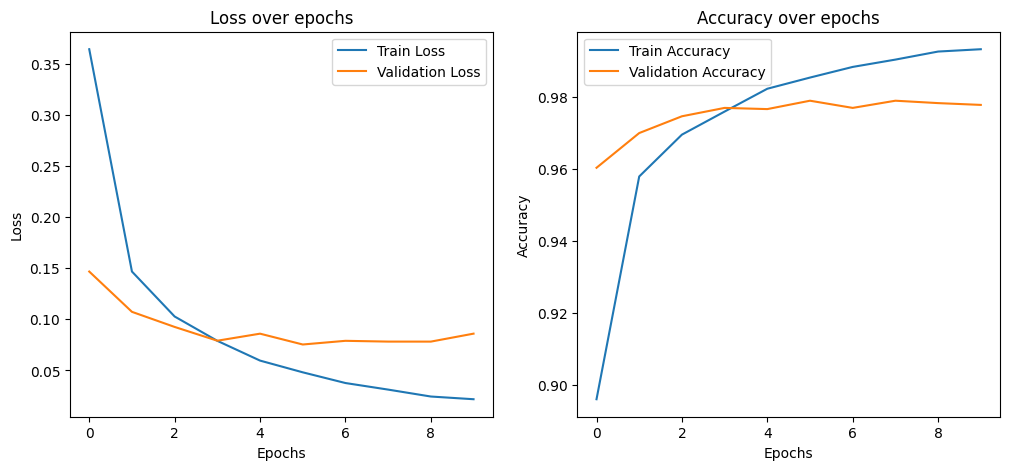

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


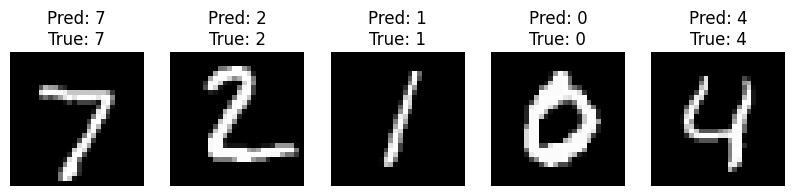

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# -----------------------
# Build Neural Network
# -----------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flatten 28x28 images → 784 vector
    Dense(128, activation='relu'),     # Hidden layer
    Dense(64, activation='relu'),      # Hidden layer
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------
# Train the model
# -----------------------
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

# -----------------------
# Evaluate on test set
# -----------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest accuracy:", test_acc)

# -----------------------
# Plot training history
# -----------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# -----------------------
# Test on a few sample images
# -----------------------
import numpy as np

sample_images = x_test[:5]
sample_labels = np.argmax(y_test[:5], axis=1)

predictions = model.predict(sample_images)

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.show()
